# intro to regression with neural networks in tensorflow

there are many definitions of a regression problem: here is our simplified version: predicting a numerical variable based on some other combination of variables.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# create data to view and fit

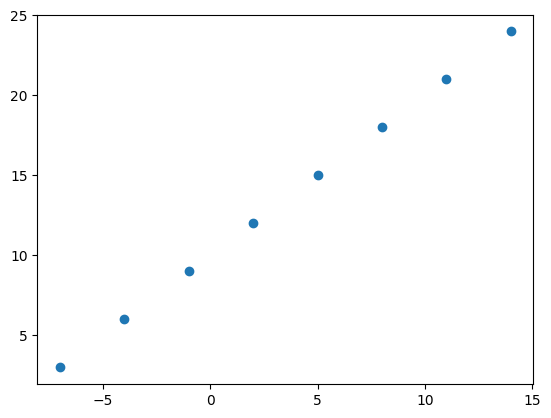

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize these
plt.scatter(X, y)

# input and output shapes

In [ ]:
#create a demo tensor for our housing pricing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape # shape is () because y[0] is a scalar with rank 0(0 dimensions)
input_shape, output_shape

((), ())

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# steps in modeling with tensorflow
1. create a model - define input and output layers as well as the hidden layers of a DL model
2. compile the model - define the loss function, and the optimizer(tells model how to improve the patterns its learning), and evaluation metrics
3. fitting the model - letting the model try to find the patterns between x and y(features & labels)

In [ ]:
# create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 964ms/step - loss: 8.0084 - mae: 8.0084
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8759 - mae: 7.8759
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7434 - mae: 7.7434
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6109 - mae: 7.6109
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4784 - mae: 7.4784
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4513 - mae: 7.4513
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss:

**keras.Sequential description**: keras.Sequential is an API from the keras library which allows the user to build a model based on a sequential architecture. The sequential architecture is one where the hidden layers of the model are stacked on each other, making the output of each layer part of the input of the next layer. It is simple in that there are no complex branches, merging, etc that are availble with keras.functional API. You can, however, implement various architectiures, like CNN's, using keras.Sequential. keras.Sequential is typcially used for simple data, but can be used for complex data as well like image classification.

In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 179ms/step


array([[30.411135]], dtype=float32)

# Improving our model

various way to improve model:
- introduce more/less layers and or neurons
- run the model on more epochs
- change the optimizer or learning rate

In [ ]:
# create a new, larger model to try to get better results
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# compile the model
model1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
              metrics = ["mae"])

#fit the model
model1.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.4790 - mae: 15.4790
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 14.5945 - mae: 14.5945
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 13.8955 - mae: 13.8955
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2042 - mae: 13.2042
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5173 - mae: 12.5173
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8329 - mae: 11.8329
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1499 - mae: 11.1499
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4666 - mae: 10.4666
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7814 - mae: 9.7814
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0926 - mae: 9.0926
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [ ]:
# try to make a prediction using our model1
y_pred1 = model1.predict([17.0])
y_pred1

1/1 [==============================] - 0s 161ms/step


array([[27.328676]], dtype=float32)

# Evaluating a model

in practice, a typical workflow youll go through is:
- build a model
- fit it
- evaluate it
- tweak the model
- fit it
- evaluate it
- tweak the model
- etc etc

In [ ]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

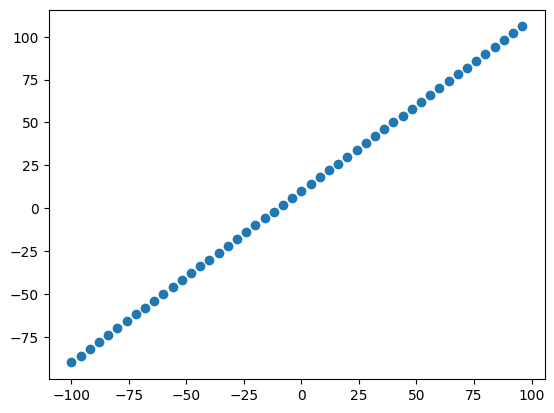

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

# the three sets...

**training set** - 70-80% of the dataset
**validation set** - the model gets tuned on this data; typically 10-15% of the dataset
**test set** - the model gets evaluated on this data to test what it has learned; typically 10-15% of the dataset

In [ ]:
# split into train and test
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]


# visualize the data

lets visualize the data in our training and test sets

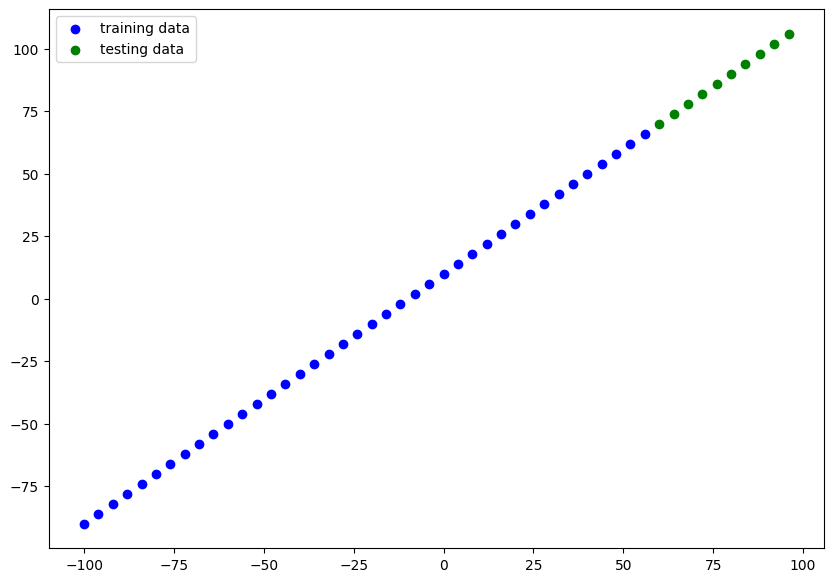

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "training data")
plt.scatter(X_test, y_test, c = "g", label = "testing data")
plt.legend()

In [ ]:
# create a model that builds automatically by defining an input shape in the first layer

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer") # this layer has 1 neuron because there is 1 y value per 1 x value (?)
], name = "model_2")
model2.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate = .0005),
    metrics = ["mae"]
)
model2.summary()
model2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 2s 8ms/step - loss: 63.7964 - mae: 63.7964
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 63.0316 - mae: 63.0316
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 62.2326 - mae: 62.2326
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 61.4745 - mae: 61.4745
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 60

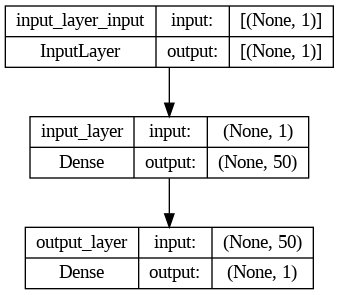

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model2, show_shapes=True)

**total parameters**- how many different patterns the model is going to try to learn about the relationship between the x and y datas

**trainable parameters** - these are the parameters(patterns) the model can update as it trains

**non-trainable parameters** - these parameters are not updated during training. this is typical when you bring in already learned patterns or parameters from other models during transfer learning

**RESOURCE** - more in depth on trainable/non-trainable parameters: introtodeeplearning.com

# visualizing our model's predictions

- good idea to plot the predictions against the ground truth
- y test versus y pred

In [ ]:
#make predictions
y_pred = model2.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[ 70.029495],
       [ 74.03114 ],
       [ 78.0328  ],
       [ 82.03446 ],
       [ 86.03611 ],
       [ 90.03775 ],
       [ 94.03941 ],
       [ 98.04108 ],
       [102.04272 ],
       [106.04437 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c = "b", label = "training data")
  plt.scatter(test_data, test_labels, c = "g", label = "testing data")
  plt.scatter(test_data, predictions, c = "r", label = "model predictions")
  plt.legend();


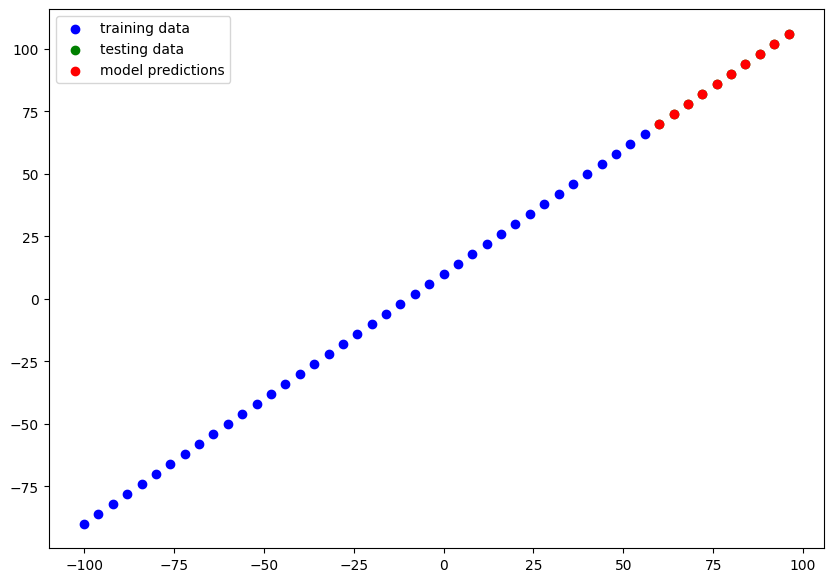

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

# evaluating model predictions with evaluation metrics

depending on the problem, there will be different evaluation metrics to evaluate model performance.

For regression, two main metrics are:
- MAE - mean absolute error, (y-x)/n, starter metric for any regression problem
- MSE - mean square error ((y-x)^2)/n, when larger errors are more significant than smaller errors
- Huber - combination of MSE and MAE, less sensitive to outliers than MSE

In [ ]:
# evaluate model on the test set
model2.evaluate(X_test, y_test)

1/1 [==============================] - 1s 554ms/step - loss: 0.0369 - mae: 0.0369


[0.036934662610292435, 0.036934662610292435]

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred, y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.029495,  74.03114 ,  78.0328  ,  82.03446 ,  86.03611 ,
         90.03775 ,  94.03941 ,  98.04108 , 102.04272 , 106.04437 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.0369339>

In [ ]:
mse = tf.keras.losses.MSE(y_true = y_test, y_pred = y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.0013866639>

In [ ]:
def evaluation_metrics(y_true, y_test):
  mae = tf.keras.losses.MAE(y_true = y_test, y_pred = y_pred)
  mse = tf.keras.losses.MSE(y_true = y_test, y_pred = y_pred)
  return mae, mse

# running experiments to improve models

build -> fit -> evaluate -> tweak -> fit -> evaluate...

1. get more data
2. make the model larger
3. train for longer

3 modeling experiments:
- model2a - more layers less epochs
- model2c - more layers more epochs

# note
more neurons/layers may lead to overfitting. The more neurons and layers there are in a model, the more ability it has to learn complex relationships in the data. Therefore, for simpler data, probably better to use less layers(1 or 2?) to learn the data. The amount of neurons generally should be some fraction 0-1 of the number of features in the data.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
model2a = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = None, input_shape = [1]),
    tf.keras.layers.Dense(1, name = "output_layer")
])
model2a.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = .005),
                metrics = ["mae"])
model2a.summary()
model2a.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 2s 34ms/step - loss: 52.0182 - mae: 52.0182
Epoch 2/1000
2/2 [==============================] - 0s 18ms/step - loss: 51.5694 - mae: 51.5694
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 51.1148 - mae: 51.1148
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 50.6922 - mae: 50.6922
Epoch 5/1000
2/2 [==============================] - 0s 11ms/step - loss:

# Tracking experiments

really good tip for machine learning is to track the results of all your experiments. You want to experiment with smaller models and upscale when necessary - so save all the results of all the experiments to help compare them later

**tensorboard** tensorflow visualization toolkit
**weights & biases** plugin for tensorboard for tracking experiments

# Saving our models using SavedModel and HD5 formats

In [ ]:
# Saving the best model using SavedModel format(for smaller models)

model2a.save("best_model")

In [ ]:
# Saving the best model using HD5(for larger models)

model2a.save("best_model_HD5.hf")

In [ ]:
#Load the model back in to ensure it works

loaded_SavedModel = tf.keras.models.load_model("/content/best_model")
loaded_SavedModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# A larger example

In [ ]:
# import required libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# read in the insurance dataset(raw github link)
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# have to create a numerical encoding for the non numerical variables
# need to convert categorical variables using pandas.get_dummies() into one hot encodings

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# create X and y values(features and labels)
X_ins = insurance_one_hot.drop("charges", axis = 1)
y_ins = insurance_one_hot["charges"]
X_ins.head(), y_ins.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# split into testing and training using train_test_split()
from sklearn.model_selection import train_test_split

# train test split(X, y, test_size = .2)
X_ins_train, X_ins_test, y_ins_train, y_ins_test = train_test_split(X_ins, y_ins, test_size = .2)
X_ins_train.head(), y_ins_train.head()

(      age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 969    39  34.32         5           1         0          1           0   
 753    58  22.77         0           1         0          1           0   
 1162   30  38.83         1           0         1          1           0   
 1073   54  28.88         2           1         0          1           0   
 1250   24  29.83         0           0         1          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 969                  0                 0                 1                 0  
 753                  0                 0                 1                 0  
 1162                 0                 0                 1                 0  
 1073                 1                 0                 0                 0  
 1250                 1                 0                 0                 0  ,
 969      8596.82780
 753     11833.78230
 1162    18963.1719

In [ ]:
# build a neural network

ins_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
ins_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = .003),
    metrics = ["mae"]
)
ins_model.fit(X_ins_train, y_ins_train, epochs = 2000)

Epoch 1/2000
34/34 [==============================] - 1s 2ms/step - loss: 13287.1807 - mae: 13287.1807
Epoch 2/2000
34/34 [==============================] - 0s 2ms/step - loss: 13235.2656 - mae: 13235.2656
Epoch 3/2000
34/34 [==============================] - 0s 2ms/step - loss: 13165.8008 - mae: 13165.8008
Epoch 4/2000
34/34 [==============================] - 0s 1ms/step - loss: 13070.0625 - mae: 13070.0625
Epoch 5/2000
34/34 [==============================] - 0s 2ms/step - loss: 12940.8115 - mae: 12940.8115
Epoch 6/2000
34/34 [==============================] - 0s 2ms/step - loss: 12773.4717 - mae: 12773.4717
Epoch 7/2000
34/34 [==============================] - 0s 2ms/step - loss: 12566.5527 - mae: 12566.5527
Epoch 8/2000
34/34 [==============================] - 0s 1ms/step - loss: 12319.0547 - mae: 12319.0547
Epoch 9/2000
34/34 [==============================] - 0s 1ms/step - loss: 12027.9873 - mae: 12027.9873
Epoch 10/2000
34/34 [==============================] - 0s 2ms/step - loss

In [ ]:
ins_model.evaluate(X_ins_test, y_ins_test)

9/9 [==============================] - 0s 2ms/step - loss: 3085.6111 - mae: 3085.6111


[3085.611083984375, 3085.611083984375]

In [ ]:
# try to improve model by adding more layers

ins_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
ins_model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = .0001), #.001
    metrics = ["mae"]
)
history = ins_model1.fit(X_ins_train, y_ins_train, epochs = 3000)

Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 2ms/step - loss: 6627.4785 - mae: 6627.4785
Epoch 502/3000
34/34 [==============================] - 0s 2ms/step - loss: 6626.4185 - mae: 6626.4185
Epoch 503/3000
34/34 [==============================] - 0s 2ms/step - loss: 6625.2397 - mae: 6625.2397
Epoch 504/3000
34/34 [==============================] - 0s 2ms/step - loss: 6623.8350 - mae: 6623.8350
Epoch 505/3000
34/34 [==============================] - 0s 2ms/step - loss: 6622.4683 - mae: 6622.4683
Epoch 506/3000
34/34 [==============================] - 0s 2ms/step - loss: 6621.4180 - mae: 6621.4180
Epoch 507/3000
34/34 [==============================] - 0s 2ms/step - loss: 6620.6079 - mae: 6620.6079
Epoch 508/3000
34/34 [==============================] - 0s 2ms/step - loss: 6618.8525 - mae: 6618.8525
Epoch 509/3000
34/34 [==============================] - 0s 2ms/step - loss: 6617.8662 - mae: 6617.8662
Epoch 510/3000
34/34 [===============

Text(0.5, 0, 'epochs')

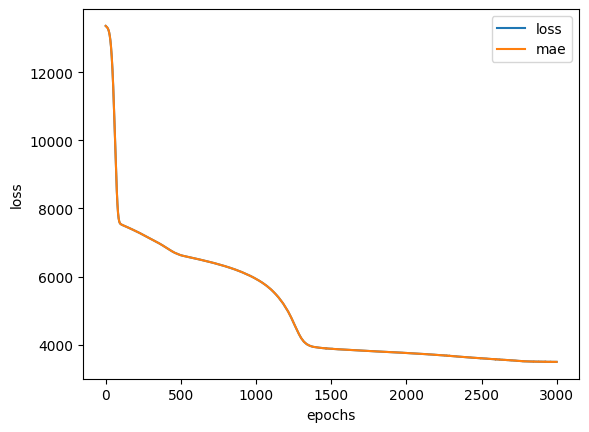

In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")